In [ ]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
#file_id = '1J05tsCBwdhEwkXygcbpKNztsXA6qErPC'
#downloaded = drive.CreateFile({'id': file_id})
#print('Downloaded content "{}"'.format(downloaded.GetContentString()))

In [ ]:
!pip install twitterscraper
!pip install vaderSentiment
!pip install langdetect



In [ ]:
#Importing the relevent libraries
import pandas as pd
import datetime as dt
from twitterscraper import query_tweets
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from langdetect import detect
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab


In [ ]:
begin_date = dt.date(2018,1,1)
end_date = dt.date(2020,3,26)
limit = 100000
lang = 'english'


In [ ]:
tweets = query_tweets("advisory", begindate = begin_date, enddate = end_date, limit = limit, lang = lang)


In [ ]:
#Transforming it into a dataframe
#df = pd.DataFrame(t.__dict__ for t in tweets)
#Saving a file
#df.to_csv('TwitterData.csv')

In [ ]:
df_jp_wm = pd.read_json('pretty_jp_tweets_advisory.json')

df_gs_wm = pd.read_json('pretty_gs_tweets_advisory.json')

df_ms_wm = pd.read_json('pretty_ms_tweets_advisory.json')

df_ml_wm = pd.read_json('pretty_ml_tweets_advisory.json')



#sample = pd.read_csv('TwitterData.csv')



In [ ]:
df_jp_wm = df_jp_wm.assign(company = "JPM")

In [ ]:
df_gs_wm = df_gs_wm.assign(company = "GS")

In [ ]:
df_ml_wm = df_ml_wm.assign(company = "ML")

In [ ]:
df_ms_wm = df_gs_wm.assign(company = "MS")

In [ ]:
df_all_wm = pd.concat([df_jp_wm,df_gs_wm,df_ml_wm,df_ms_wm])

In [ ]:
#Sentiment Analysis
#Vader Sentiment

In [ ]:
analyzer = SentimentIntensityAnalyzer()

In [ ]:
sentiment = df_all_wm['text'].apply(lambda x: analyzer.polarity_scores(x))

In [ ]:
#Inserting the sentiment into the dataframe
df_all_wm = pd.concat([df_all_wm, sentiment.apply(pd.Series)],1)

In [ ]:
#df['compound'].hist()
#df['neg'].hist()
#df['neu'].hist()
#df['pos'].hist()

In [ ]:
df_all_wm['date'] = df_all_wm['timestamp'].apply(lambda x: x.date())

In [ ]:
#Filter = df_all_wm['text'].apply(lambda x: 'jp' in x.lower())
#df_filter = df_all_wm[Filter]
#df_filter.shape
df_filter = df_all_wm

Text(0, 0.5, 'Sentiment')

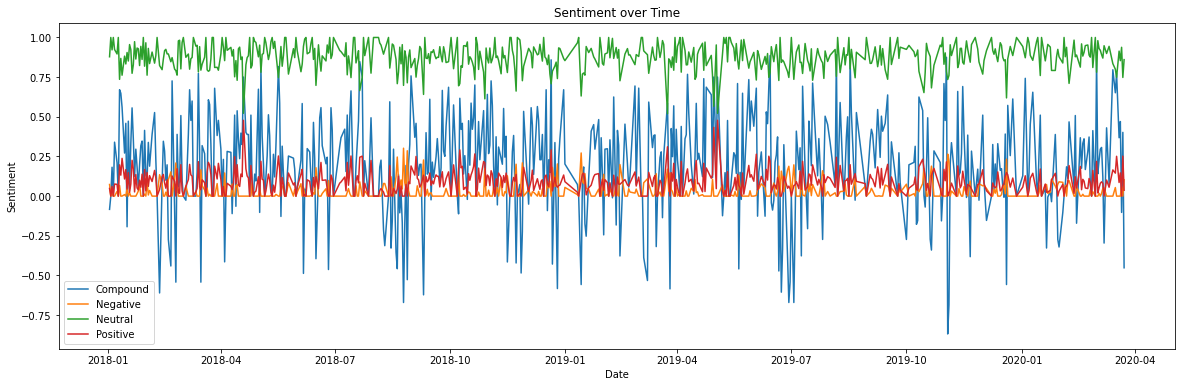

In [ ]:
plt.figure(figsize = (20,6))
plt.plot(df_filter.groupby('date').mean()['compound'].index, df_filter.groupby('date').mean()['compound'].values, label = 'Compound')
plt.plot(df_filter.groupby('date').mean()['neg'].index, df_filter.groupby('date').mean()['neg'].values, label = 'Negative')
plt.plot(df_filter.groupby('date').mean()['neu'].index, df_filter.groupby('date').mean()['neu'].values, label = 'Neutral')
plt.plot(df_filter.groupby('date').mean()['pos'].index, df_filter.groupby('date').mean()['pos'].values, label = 'Positive')

plt.legend(loc = 'best')
plt.title('Sentiment over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment')

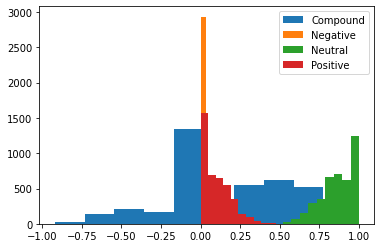

In [ ]:

plt.hist(df_filter['compound'].values, label = 'Compound')
plt.hist(df_filter['neg'].values, label = 'Negative')
plt.hist(df_filter['neu'].values, label = 'Neutral')
plt.hist(df_filter['pos'].values, label = 'Positive')

plt.legend(loc = 'best')

In [ ]:
df_wm_sent_jp = df_all_wm[df_all_wm['company'] == 'JPM']
df_wm_sent_jp.head(10)

df_wm_sent_ms = df_all_wm[df_all_wm['company'] == 'MS']
df_wm_sent_ms.head(10)

df_wm_sent_ml = df_all_wm[df_all_wm['company'] == 'ML']
df_wm_sent_ml.head(10)

df_wm_sent_gs = df_all_wm[df_all_wm['company'] == 'GS']
df_wm_sent_gs.head(10)

df_wm_sent_gs.mean()['compound'], df_wm_sent_gs.mean()['neg'], df_wm_sent_gs.mean()['neu'], df_wm_sent_gs.mean()['pos']

df_all_wm_com = df_all_wm.groupby('company')['compound'].mean()
df_all_wm_neu = df_all_wm.groupby('company')['neu'].mean()
df_all_wm_neg = df_all_wm.groupby('company')['neg'].mean()
df_all_wm_pos = df_all_wm.groupby('company')['pos'].mean()


# Grouped bar plot with seaborn
import seaborn as sns





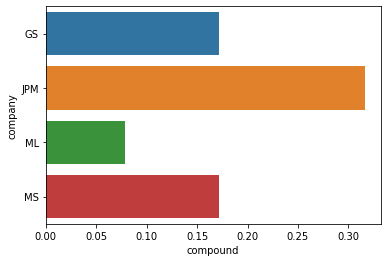

In [ ]:
df_all_wm_com = pd.DataFrame(df_all_wm_com)
df_all_wm_com = df_all_wm_com.reset_index()
sns.barplot(y='company',x='compound',data=df_all_wm_com)

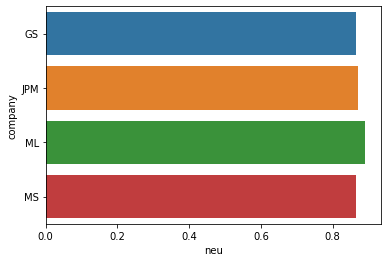

In [ ]:
df_all_wm_neu = pd.DataFrame(df_all_wm_neu)
df_all_wm_neu = df_all_wm_neu.reset_index()
sns.barplot(y='company',x='neu',data=df_all_wm_neu)

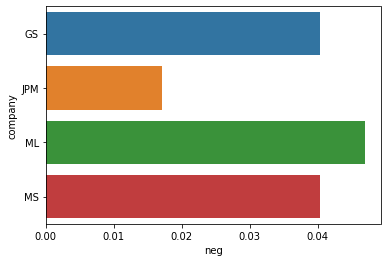

In [ ]:
df_all_wm_neg = pd.DataFrame(df_all_wm_neg)
df_all_wm_neg = df_all_wm_neg.reset_index()
sns.barplot(y='company',x='neg',data=df_all_wm_neg)

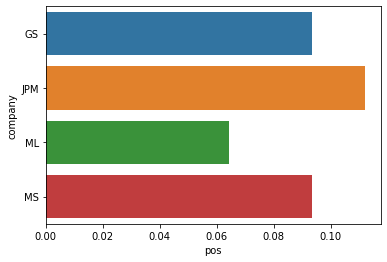

In [ ]:
df_all_wm_pos = pd.DataFrame(df_all_wm_pos)
df_all_wm_pos = df_all_wm_pos.reset_index()
sns.barplot(y='company',x='pos',data=df_all_wm_pos)